<a href="https://colab.research.google.com/github/praveenraghuvanshi1512/EVA4/blob/Session-9/Session-9/Assignment-9/EVA_4_S9_Praveen_Raghuvanshi_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Steps Summary

In [0]:
# 1. Mount google drive
# 2. Set the directory path of google drive
# 3. Import all modules and libraries
# 4. Set Device
# 5. Import all the functions
# 6. Load transformations
# 7. Load dataset
# 8. Load Classes
# 9. Display sample images
# 10. Load Resnet18 Model
# 11. Define Loss function and optimizer
# 12. Run train and test

### 1. Mount google drive

In [2]:
# Load data from Google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### 2. Set the directory path of google drive

In [0]:
import sys
%load_ext autoreload
%autoreload 2
sys.path.append('/content/drive/My Drive/eva-4/assignment-9')
sys.path.append('/content/drive/My Drive/eva-4/assignment-9/models')
sys.path.append('/content/drive/My Drive/eva-4/assignment-9/gradcam')
sys.path.append('/content/drive/My Drive/eva-4/assignment-9/sampleimages')

In [4]:
cd '/content/drive/My Drive/eva-4/assignment-9'

/content/drive/My Drive/eva-4/assignment-9


In [5]:
ls

augmentation.py  gradcam/  outputs/      S9_functions.py  utils.py
data/            models/   __pycache__/  sampleimages/


### 3. Import all modules and libraries

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import numpy as np
from torchvision.utils import make_grid

### 4. Set Device

In [7]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


###  5. Import all the functions

In [0]:
from model import Net, ResNet, resnet18
from S9_functions import myfunc, transformations, loadcifar10dataset, getclasses, display, train, test, imshow, loadimage, saveimage, getoptimizer
from gradcam import GradCAM, GradCAMpp
from gradcam_utils import Normalize, visualize_cam

###  6. Load Transformations

In [9]:
!pip install albumentations

     |████████████████████████████████| 634kB 8.1MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=9415c56bc703de23fc81cad713f3e53deb46ecee2c724b173c038b56b7a1c322
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [10]:
transform_train, transform_test = transformations()

[autoreload of imgaug.parameters failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ValueError: __init__() requires a code object with 1 free vars, not 0
]
[autoreload of imgaug.augmenters.color failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ValueError: InColorspace() requires a code object with 3 free vars, not 0
]


###  7. Load Dataset

In [11]:
trainset, trainloader, testset, testloader = loadcifar10dataset(transform_train, transform_test)
print(trainloader)

Files already downloaded and verified
Files already downloaded and verified


###  8. Load Classes

In [12]:
classes = getclasses()
print(classes)

('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


### 9. Display sample images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


horse   car  bird   dog


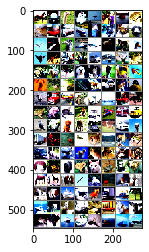

In [13]:
display(4, trainloader, classes)

### 10. Load Resnet18 Model


In [14]:
print("Building Model")
net = resnet18()

Building Model


In [15]:
# Display Model Summary
!pip install torchsummary
from torchsummary import summary

model = net.to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

### 11. Define loss function and optimizer


In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = getoptimizer(net)

### 12. Run Train and Test

In [17]:
for epoch in range(30):
    train(net, trainloader, device, optimizer, criterion, epoch)
    test(net, testloader, device, criterion, epoch)

print("Training completed")


Epoch: 0
 [================================================================>]  Step: 49ms | Tot: 30s642ms | Train >> Loss: 1.493 | Acc: 45.142% (22571/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 2s572ms | Test >> Loss: 1.384 | Acc: 50.580% (5058/10000) 79/79 

Epoch: 1
 [================================================================>]  Step: 45ms | Tot: 30s511ms | Train >> Loss: 0.995 | Acc: 64.276% (32138/50000) 391/391 
 [================================================================>]  Step: 11ms | Tot: 2s600ms | Test >> Loss: 0.973 | Acc: 65.240% (6524/10000) 79/79 

Epoch: 2
 [================================================================>]  Step: 49ms | Tot: 30s515ms | Train >> Loss: 0.758 | Acc: 73.214% (36607/50000) 391/391 
 [================================================================>]  Step: 12ms | Tot: 2s554ms | Test >> Loss: 0.890 | Acc: 68.760% (6876/10000) 79/79 

Epoch: 3
 [=========================

### 13. Grad-CAM


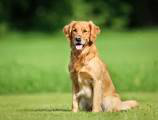

In [18]:
# Load Image
imagename = 'dog.jpg'
pil_img = loadimage('/content/drive/My Drive/eva-4/assignment-9/sampleimages', imagename)
pil_img

In [25]:
normalizer = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
torch_img = torch.from_numpy(np.asarray(pil_img)).permute(2, 0, 1).unsqueeze(0).float().div(255).cuda()
torch_img = F.upsample(torch_img, size=(32, 32), mode='bilinear', align_corners=False)
normed_torch_img = normalizer(torch_img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [29]:
resnet = model
resnet.eval(), resnet.cuda();
model_dict = dict(type='resnet', arch=resnet, layer_name='layer4', input_size=(32, 32))
gradcam = GradCAM(model_dict, True)
gradcampp = GradCAMpp(model_dict)

saliency_map size : torch.Size([4, 4])


In [32]:
mask, _ = gradcam(normed_torch_img)
heatmap, result = visualize_cam(mask.cpu(), torch_img.cpu())

mask_pp, _ = gradcampp(normed_torch_img)
heatmap_pp, result_pp = visualize_cam(mask_pp.cpu(), torch_img.squeeze().cpu())

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [0]:
imgs = []
imgs.append(torch.stack([torch_img.squeeze().cpu(), heatmap, heatmap_pp, result, result_pp], 0))
imgs = make_grid(torch.cat(imgs, 0), nrow=5)

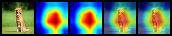

In [38]:
pilimg = saveimage(imgs, '/content/drive/My Drive/eva-4/assignment-9/outputs', imagename)
pilimg

### 14. Analysis
- No of Epochs : 30
- Best Train Acc: 95.856%
- Best Test  Acc: 91.110%
- No Model changes in Resnet18
- Extra things done
  - Normalization: 
    - transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
  - Image augmentation
    - Train
      - RandomCrop
      - RandomHorizontalFlip
    - Test
      - Nothing
- Overfitting 
  - Calculation: (100 - 91.110) + 95.856 = 104.746 --> No overfitting
  - Difference : 95.856 - 91.110 = 4.746 --> Less -> No overfitting
- Train and test acc were converging till epoch 7 and started to diverge post that.
- There has been a continous increase in train accuracy
- Test accuracy is fluctuating
- Gap between train and test acc is 4.7 in last epoch which is reasonable
- The model has capacity to be trained further but accuracy gains won't be too much.